In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("transfusion.csv")

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


R (Recency - months since last donation),<br>
F (Frequency - total number of donation),<br>
M (Monetary - total blood donated in c.c.),<br>
T (Time - months since first donation), and <br>
a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

In [4]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [5]:
df.shape

(748, 5)

In [6]:
df["Recency (months)"].value_counts()

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: Recency (months), dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9E2986C08>,
      dtype=object)

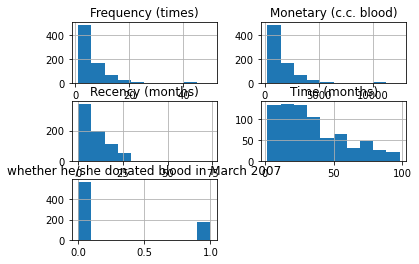

In [7]:
df.hist()

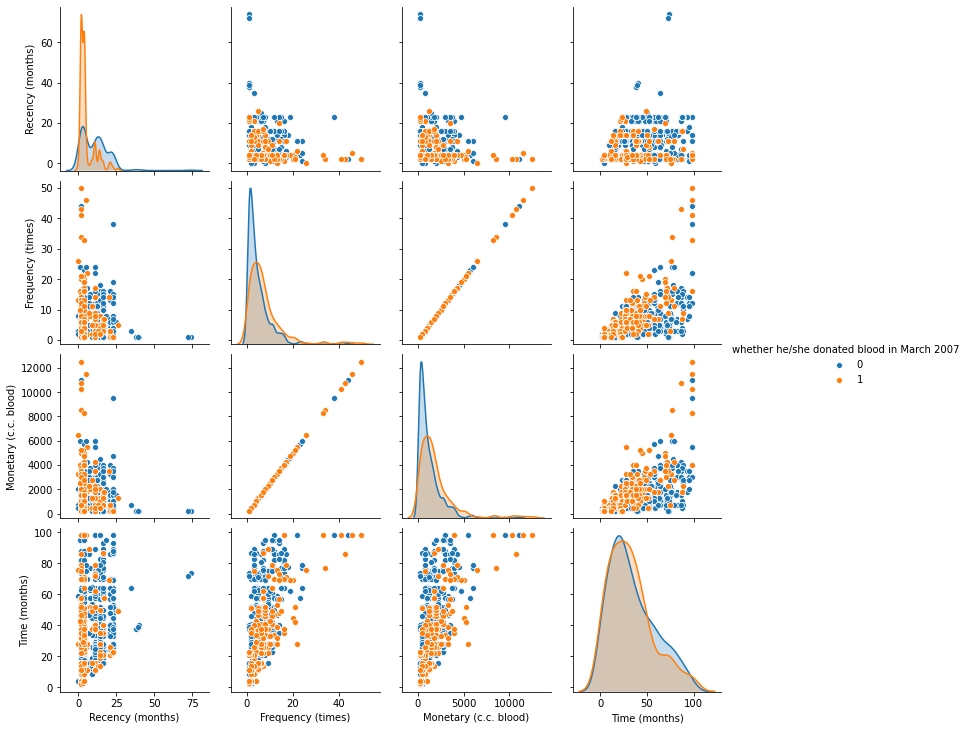

In [8]:
sns.pairplot(df,hue="whether he/she donated blood in March 2007")

In [9]:
### we can see how overlapped the data is which indicates that KNN will be a better option than Logistic Regression

In [10]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

### Recency(months)

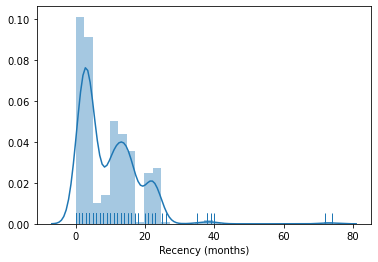

In [11]:
sns.distplot(df["Recency (months)"],kde=True,rug="True")

In [12]:
df["Recency (months)"].skew() #scaling is required

1.8804635327038797

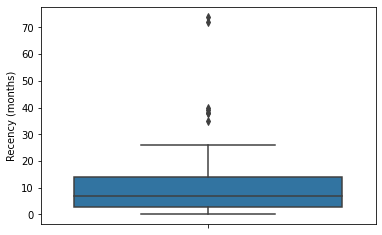

In [13]:
sns.boxplot(df["Recency (months)"],orient="v")

In [14]:
#Outliers are present

### Frequency (times)

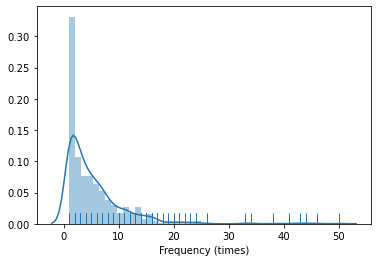

In [15]:
sns.distplot(df['Frequency (times)'],kde=True,rug=True)

In [16]:
df['Frequency (times)'].skew() # highly possitively skewed scaling required

3.2112654741848314

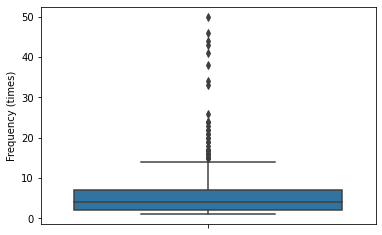

In [17]:
sns.boxplot(df['Frequency (times)'],orient="v")# many outliers present

In [18]:
df['Frequency (times)'].value_counts() # majority of the people have donation frequency within 1 and 5

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
16     13
14     13
13      9
15      6
17      4
24      3
19      2
20      2
21      2
22      2
46      1
18      1
23      1
26      1
33      1
34      1
38      1
41      1
43      1
44      1
50      1
Name: Frequency (times), dtype: int64

### Monetary (c.c. blood)

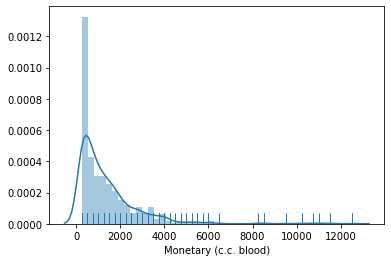

In [19]:
sns.distplot(df['Monetary (c.c. blood)'],kde=True,rug=True)

In [20]:
df['Monetary (c.c. blood)'].skew() # highly possitively skewed

3.2112654741848305

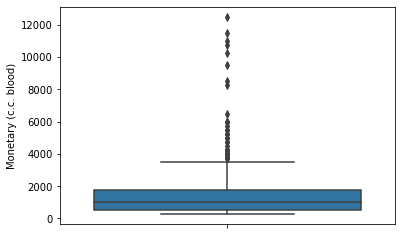

In [21]:
sns.boxplot(df['Monetary (c.c. blood)'],orient="v") # people who have more frequency of donations will have more monetary cc blood donated

### Time (months)

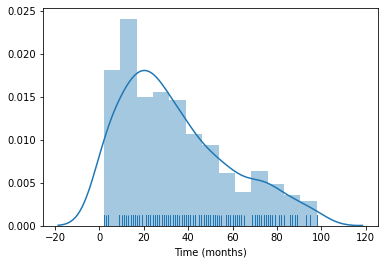

In [22]:
sns.distplot(df['Time (months)'],kde=True,rug=True)

In [23]:
df['Time (months)'].skew() #approx normal

0.7494502906271294

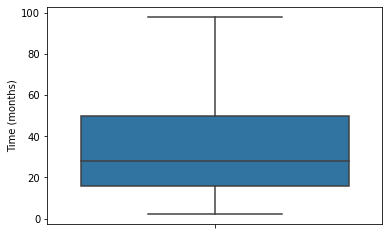

In [24]:
sns.boxplot(df['Time (months)'],orient="v")

In [25]:
df['Time (months)'].median() 

28.0

In [26]:
df['Time (months)'].value_counts().sort_values(ascending=False).head(10)

4     57
16    51
14    44
2     36
23    36
28    35
26    33
11    31
35    30
21    28
Name: Time (months), dtype: int64

### whether he/she donated blood in March 2007

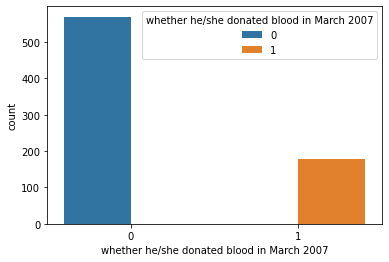

In [27]:
sns.countplot(df["whether he/she donated blood in March 2007"],hue=df["whether he/she donated blood in March 2007"])

In [28]:
df["whether he/she donated blood in March 2007"].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [29]:
### most people did not donate blood in march 2007

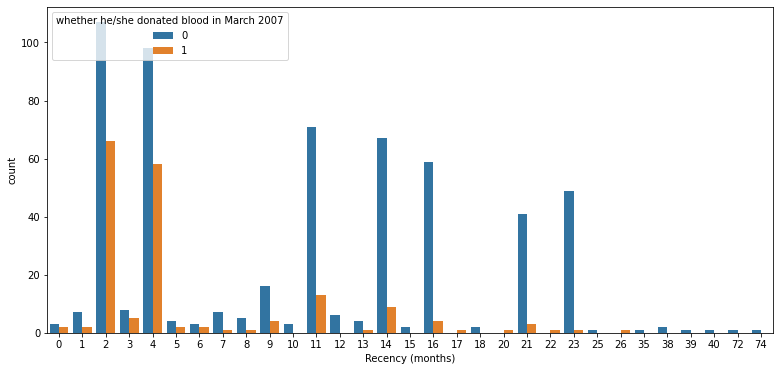

In [30]:
plt.figure(figsize=(13,6))
sns.countplot(df['Recency (months)'],hue=df['whether he/she donated blood in March 2007'])

 people who have donated 35 to 74 months ago havent donated on march 2007<br>
 count of people who have donated 2 to 4 months ago have high number donation on march 2007

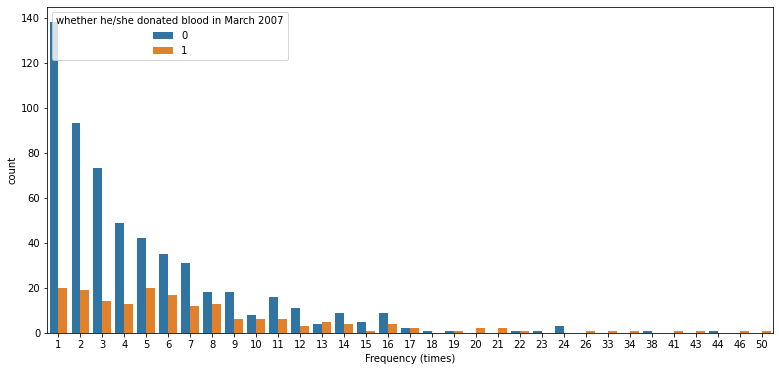

In [31]:
plt.figure(figsize=(13,6))
sns.countplot(df['Frequency (times)'],hue=df['whether he/she donated blood in March 2007'])

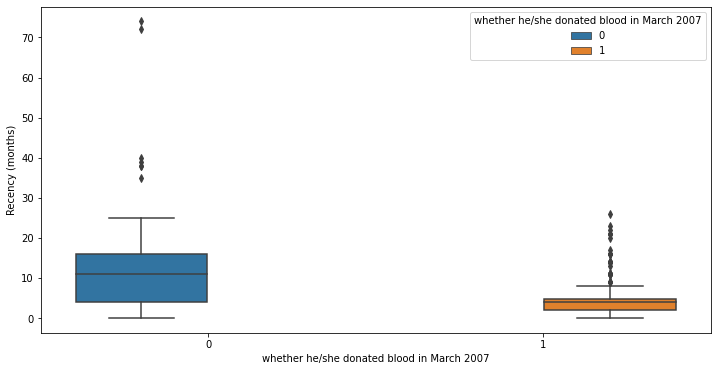

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(df['whether he/she donated blood in March 2007'],df['Recency (months)'],hue=df['whether he/she donated blood in March 2007'])


Most people who have donated recently within 10 months have donated on March 2007

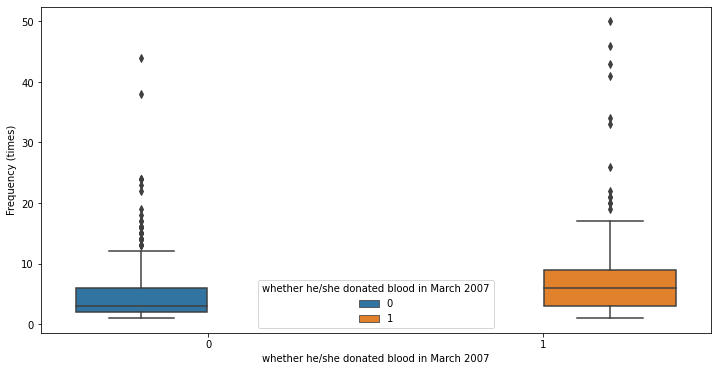

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(df['whether he/she donated blood in March 2007'],df['Frequency (times)'],hue=df['whether he/she donated blood in March 2007'])


Most people who have lower frequency of donations say less than 5 have not donated on march 2007

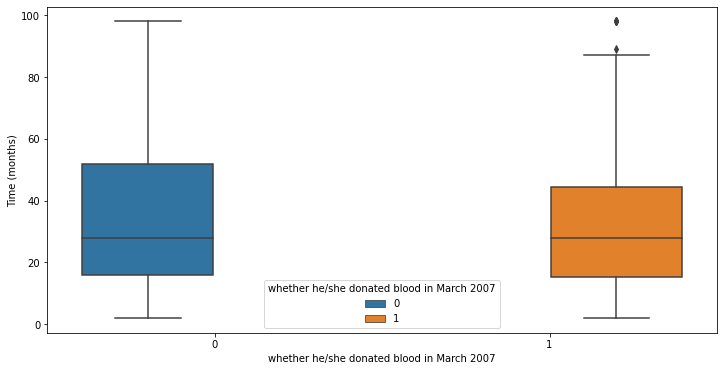

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(df['whether he/she donated blood in March 2007'],df['Time (months)'],hue=df['whether he/she donated blood in March 2007'])
#not that important feature

In [35]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [36]:
from scipy import stats

In [37]:
df['Recency (months)']=stats.yeojohnson(df['Recency (months)'])[0]

In [38]:
df['Recency (months)'].skew()

-0.004926997779309387

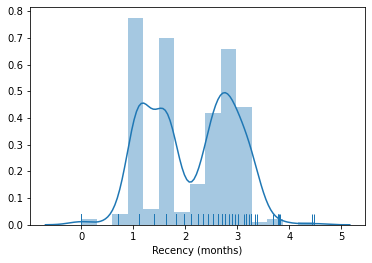

In [39]:
sns.distplot(df["Recency (months)"],kde=True,rug=True)

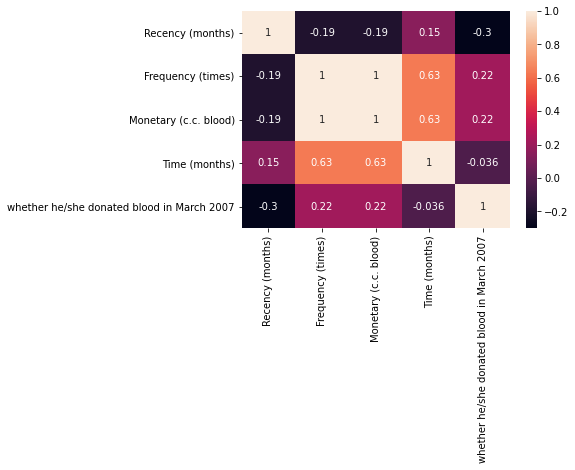

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
import statsmodels.formula.api as smf

In [42]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)

In [43]:
vif_cal(df, 'whether he/she donated blood in March 2007')

 VIF score for Recency (months) is: 1.18
 VIF score for Frequency (times) is: inf
 VIF score for Monetary (c.c. blood) is: inf
 VIF score for Time (months) is: 1.91


C:\Users\gurdit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [44]:
#we can drop either of frequency or Monetary from out data because they are high ly correlated with each other and same correlation with the target variable

In [45]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,1.108507,50,12500,98,1
1,0.000000,13,3250,28,1
2,0.697077,16,4000,35,1
3,1.108507,20,5000,45,1
4,0.697077,24,6000,77,0


In [46]:
## apply log transformation on Frequency(times)

In [47]:
b=np.log(df["Frequency (times)"])

In [48]:
pd.Series(b).skew()

0.12890491849662614

In [49]:
#df["Frequency (times)"]=np.log(df["Frequency (times)"])

In [50]:
#df.head()

In [51]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,1.108507,50,12500,98,1
1,0.000000,13,3250,28,1
2,0.697077,16,4000,35,1
3,1.108507,20,5000,45,1
4,0.697077,24,6000,77,0


In [52]:
df["Frequency (times)"]=stats.yeojohnson(df['Frequency (times)'])[0]

In [53]:
df["Frequency (times)"].skew()

0.06548211866601183

In [54]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,1.108507,2.310289,12500,98,1
1,0.000000,1.824072,3250,28,1
2,0.697077,1.909632,4000,35,1
3,1.108507,1.997267,5000,45,1
4,0.697077,2.065513,6000,77,0


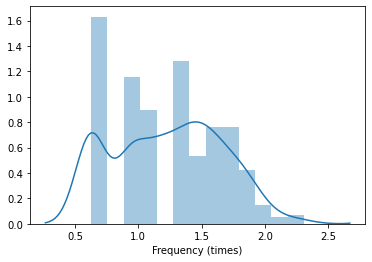

In [55]:
sns.distplot(df["Frequency (times)"])

In [56]:
#df["Monetary (c.c. blood)"]=stats.yeojohnson(df["Monetary (c.c. blood)"])[0]

In [57]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,1.108507,2.310289,12500,98,1
1,0.000000,1.824072,3250,28,1
2,0.697077,1.909632,4000,35,1
3,1.108507,1.997267,5000,45,1
4,0.697077,2.065513,6000,77,0


In [58]:
#df["Monetary (c.c. blood)"].value_counts()

In [59]:
a=np.log(df["Monetary (c.c. blood)"])

In [60]:
a

0      9.433484
1      8.086410
2      8.294050
3      8.517193
4      8.699515
         ...   
743    6.214608
744    6.214608
745    6.620073
746    5.521461
747    5.521461
Name: Monetary (c.c. blood), Length: 748, dtype: float64

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
d=sc.fit_transform(df.iloc[:,3:4])

In [64]:
e=np.abs(d)

In [65]:
e

array([[2.61563344],
       [0.2578809 ],
       [0.02947053],
       [0.43997258],
       [1.75357914],
       [1.24308582],
       [0.83258377],
       [0.02947053],
       [0.50418213],
       [2.61563344],
       [0.97362525],
       [1.24308582],
       [0.2578809 ],
       [0.52207299],
       [0.79153356],
       [0.95573438],
       [0.5631232 ],
       [0.6041734 ],
       [0.79153356],
       [1.24308582],
       [1.24308582],
       [0.2578809 ],
       [0.75048336],
       [0.75048336],
       [0.75048336],
       [0.23472156],
       [0.83258377],
       [0.01157967],
       [0.95573438],
       [0.54523233],
       [0.97362525],
       [0.2578809 ],
       [0.2578809 ],
       [0.33998131],
       [1.21992648],
       [0.2578809 ],
       [0.52207299],
       [0.75048336],
       [0.93257504],
       [0.50418213],
       [0.76837422],
       [0.75048336],
       [0.75048336],
       [0.75048336],
       [1.4251775 ],
       [0.2578809 ],
       [0.07052074],
       [1.325

In [66]:
df["Time (months)"]=e

In [67]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,1.108507,2.310289,12500,2.615633,1
1,0.000000,1.824072,3250,0.257881,1
2,0.697077,1.909632,4000,0.029471,1
3,1.108507,1.997267,5000,0.439973,1
4,0.697077,2.065513,6000,1.753579,0


In [68]:
#a=np.log(df["Time (months)"])

In [69]:
#a

In [70]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

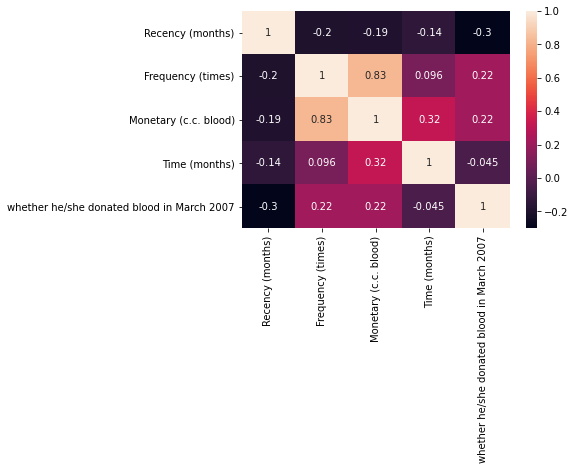

In [71]:
sns.heatmap(df.corr(),annot=True)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x=df.iloc[:,1:4]
y=df.iloc[:,4]

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [75]:
x_train.head()

,Frequency (times),Monetary (c.c. blood),Time (months)
422,0.936146,500,0.463132
541,1.710629,2500,0.727324
72,1.933887,4250,1.507278
213,0.625921,250,1.243086
381,0.625921,250,0.832584


In [76]:
len(x_train),len(y_train)

(673, 673)

In [77]:
len(x_test)

75

In [78]:
y_train.value_counts()

0    510
1    163
Name: whether he/she donated blood in March 2007, dtype: int64

In [79]:
y_test.value_counts()

0    60
1    15
Name: whether he/she donated blood in March 2007, dtype: int64

In [80]:
#KNN model for a given k

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [83]:
knn.score(x_test,y_test)

0.76

In [84]:
knn.score(x_train,y_train)

0.7726597325408618

In [85]:
#Now lets remove the monetary feature due to multicollinearity and test the accuracy of the model

In [86]:
x_train=x_train.drop("Monetary (c.c. blood)",axis=1)

In [87]:
x_test=x_test.drop("Monetary (c.c. blood)",axis=1)

In [88]:
knn1=KNeighborsClassifier(n_neighbors=11)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [89]:
knn1.score(x_test,y_test)

0.8133333333333334

In [90]:
knn1.score(x_train,y_train)

0.7771173848439822

In [91]:
# Evaluate our model for randomly chosen value of k=11

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [93]:
kfold1=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [94]:
res=cross_val_score(knn1,x_train,y_train,cv=kfold1)

In [95]:
res

array([0.70588235, 0.79411765, 0.80882353, 0.70149254, 0.79104478,
       0.79104478, 0.74626866, 0.64179104, 0.7761194 , 0.76119403])

In [96]:
res.mean()

0.7517778753292361

In [97]:
restest=cross_val_score(knn1,x_test,y_test,cv=kfold1)

In [98]:
restest

array([0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.71428571])

In [99]:
restest.mean()

0.7892857142857143

In [100]:
# for default k=5

In [101]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [102]:
knn.score(x_test,y_test)

0.8

In [103]:
knn.score(x_train,y_train)

0.7860326894502229

In [104]:
# Evaluate our model for k=5 default

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [106]:
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=7)
results=cross_val_score(knn,x_train,y_train,cv=kfold)

In [107]:
results

array([0.77941176, 0.63235294, 0.72058824, 0.73134328, 0.71641791,
       0.64179104, 0.82089552, 0.68656716, 0.71641791, 0.68656716])

In [108]:
results.mean()

0.7132352941176471

In [109]:
results.std()

0.054259457443532146

In [110]:
# above result is for default value of k=5

In [111]:
resultstest=cross_val_score(knn,x_test,y_test,cv=kfold)

In [112]:
resultstest

array([0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       1.        , 0.71428571, 1.        , 0.85714286, 0.85714286])

In [113]:
resultstest.mean()

0.8178571428571428

In [114]:
resultstest.std()

0.10158187609519923

In [115]:
# finding Optimal value of K 

In [116]:
from sklearn.pipeline import Pipeline

In [117]:
estimators=[]
estimators.append(("knn",KNeighborsClassifier()))
model=Pipeline(estimators)


In [118]:
# define search space
search_space=[{
                "knn__n_neighbors":range(1,100),
                "knn__weights":["uniform","distance"]
}]

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)
clf=GridSearchCV(model,search_space,cv=kfold,return_train_score=True,verbose=True)
clf=clf.fit(x_train,y_train)

Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed:  1.4min finished


In [121]:
clf.best_estimator_

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=47))])

In [135]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import neighbors

In [138]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k=' , K , 'is:', error)

RMSE value for k= 1 is: 0.5163977794943222
RMSE value for k= 2 is: 0.458257569495584
RMSE value for k= 3 is: 0.4405383911466446
RMSE value for k= 4 is: 0.43204937989385733
RMSE value for k= 5 is: 0.4226897995772629
RMSE value for k= 6 is: 0.43290577197284796
RMSE value for k= 7 is: 0.41469602013480455
RMSE value for k= 8 is: 0.40748210594658835
RMSE value for k= 9 is: 0.40123266856150647
RMSE value for k= 10 is: 0.3958114029012639
RMSE value for k= 11 is: 0.3966804405322078
RMSE value for k= 12 is: 0.39616214413349043
RMSE value for k= 13 is: 0.39999999999999997
RMSE value for k= 14 is: 0.395639497832178
RMSE value for k= 15 is: 0.39695134509202806
RMSE value for k= 16 is: 0.3974528273896161
RMSE value for k= 17 is: 0.3941322795059524
RMSE value for k= 18 is: 0.3935174291923921
RMSE value for k= 19 is: 0.3945145572963617
RMSE value for k= 20 is: 0.39408120990476064
RMSE value for k= 21 is: 0.39286916768513597
RMSE value for k= 22 is: 0.3886119964007242
RMSE value for k= 23 is: 0.390885

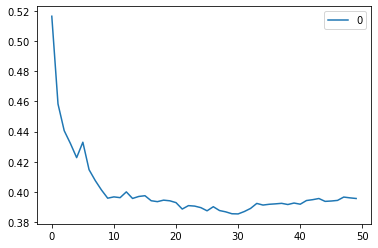

In [139]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [122]:
#n_neighbors =17 is my optimal value for k

In [123]:
param_cols=['param_knn__n_neighbors']
score_cols=['mean_train_score','mean_test_score']

# look at params
df1=pd.DataFrame(clf.cv_results_)
display(df1[param_cols+score_cols])

,param_knn__n_neighbors,mean_train_score,mean_test_score
0,1,0.842494,0.656629
1,1,0.842494,0.656629
2,2,0.799729,0.736962
3,2,0.866097,0.705729
4,3,0.802205,0.698156
...,...,...,...
193,97,0.881127,0.729500
194,98,0.757801,0.757836
195,98,0.881127,0.729500
196,99,0.757801,0.757836


In [124]:
#After finding optimal value of k=17 for range 1 to 20 and 47 for range 1 to 100

In [125]:
knn11=KNeighborsClassifier(n_neighbors=47)
knn11.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=47)

In [126]:
knn11.score(x_train,y_train)

0.7607726597325408

In [127]:
knn11.score(x_test,y_test)

0.8

In [128]:
pred=knn11.predict(x_test)

In [129]:
from sklearn.metrics import confusion_matrix


In [130]:
print(confusion_matrix(y_test,pred,labels=[0,1]))

[[60  0]
 [15  0]]


In [131]:
tp,fp,fn,tn=confusion_matrix(y_test,pred).ravel()

In [132]:
print("TP",tp)
print("FP",fp)
print("TN",tn)
print("FN",fn)



TP 60
FP 0
TN 0
FN 15


In [133]:
y_test.value_counts()

0    60
1    15
Name: whether he/she donated blood in March 2007, dtype: int64

# Normalize data

In [121]:
from sklearn.preprocessing import Normalizer

In [122]:
nd=pd.read_csv("transfusion.csv")

In [123]:
nd.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [124]:
scaler = Normalizer()

In [125]:
dft=nd.drop("whether he/she donated blood in March 2007",axis=1)

In [126]:
dft

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [131]:
data_tf = scaler.fit_transform(dft)

In [132]:
data_tf

array([[1.59993801e-04, 3.99984503e-03, 9.99961257e-01, 7.83969625e-03],
       [0.00000000e+00, 3.99981956e-03, 9.99954891e-01, 8.61499598e-03],
       [2.49988423e-04, 3.99981476e-03, 9.99953691e-01, 8.74959479e-03],
       ...,
       [3.05479100e-02, 3.98451000e-03, 9.96127500e-01, 8.23465400e-02],
       [1.52335615e-01, 3.90604140e-03, 9.76510350e-01, 1.52335615e-01],
       [2.66723383e-01, 3.70449144e-03, 9.26122859e-01, 2.66723383e-01]])

In [133]:
scaledf=pd.DataFrame(data_tf,columns=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'])

In [134]:
scaledf

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.000160,0.004000,0.999961,0.007840
1,0.000000,0.004000,0.999955,0.008615
2,0.000250,0.004000,0.999954,0.008750
3,0.000400,0.004000,0.999951,0.009000
4,0.000167,0.004000,0.999910,0.012832
...,...,...,...,...
743,0.045819,0.003984,0.996069,0.075701
744,0.041738,0.003975,0.993761,0.103351
745,0.030548,0.003985,0.996127,0.082347
746,0.152336,0.003906,0.976510,0.152336


In [135]:
scaledf["whether he/she donated blood in March 2007"]=df.iloc[:,4]

In [136]:
scaledf.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0.000160,0.004,0.999961,0.007840,1
1,0.000000,0.004,0.999955,0.008615,1
2,0.000250,0.004,0.999954,0.008750,1
3,0.000400,0.004,0.999951,0.009000,1
4,0.000167,0.004,0.999910,0.012832,0


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [139]:
knn3=KNeighborsClassifier()

In [140]:
knn3.fit(x_train,y_train)

KNeighborsClassifier()

In [141]:
knn3.score(x_train,y_train)

0.7964338781575037

In [142]:
knn3.score(x_test,y_test)

0.76

In [143]:
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=7)

In [144]:
r=cross_val_score(knn3,x_train,y_train,cv=kf)

In [145]:
r

array([0.79411765, 0.66176471, 0.77941176, 0.71641791, 0.74626866,
       0.65671642, 0.74626866, 0.71641791, 0.73134328, 0.71641791])

In [146]:
r.mean()

0.7265144863915716

In [ ]:
# remove Monetary feature

In [147]:
x_train.drop("Monetary (c.c. blood)",axis=1,inplace=True)

C:\Users\gurdit\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
x_train

,Frequency (times),Time (months)
422,0.936146,0.463132
541,1.710629,0.727324
72,1.933887,1.507278
213,0.625921,1.243086
381,0.625921,0.832584
...,...,...
71,1.276987,0.750483
106,1.609783,1.014675
270,1.752508,0.234722
435,1.547706,2.410382


In [150]:
x_test.drop("Monetary (c.c. blood)",axis=1,inplace=True)

C:\Users\gurdit\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [151]:
x_test.head()

,Frequency (times),Time (months)
580,0.625921,1.325186
356,1.474628,0.234722
133,1.474628,0.029471
250,0.936146,0.955734
299,0.936146,0.832584


In [152]:
knn4=KNeighborsClassifier()

In [159]:
knn4.fit(x_train,y_train)

KNeighborsClassifier()

In [160]:
knn4.score(x_train,y_train)

0.7860326894502229

In [161]:
knn4.score(x_test,y_test)

0.8

In [162]:
kfd=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [163]:
rt=cross_val_score(knn4,x_train,y_train,cv=kfd)

In [164]:
rt

array([0.67647059, 0.80882353, 0.80882353, 0.65671642, 0.73134328,
       0.73134328, 0.65671642, 0.62686567, 0.76119403, 0.74626866])

In [165]:
knn4.score(x_train,y_train)

0.7860326894502229

In [166]:
rt.mean()

0.7204565408252853

In [ ]:
# Got a better score after removing Monetary in all 3 cases

In [56]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR) # maximum data is clustered at IQR

Recency (months)                                 1.44002
Frequency (times)                                0.61156
Monetary (c.c. blood)                         1250.00000
Time (months)                                   34.00000
whether he/she donated blood in March 2007       0.00000
dtype: float64
